<a id='contents'></a>
## Report Contents
* <a href="#intro"> Introduction.</a>
* <a href="#wrangling"> Data Wrangling.</a>
* <a href="#eda"> Exploratory Data Analysis.</a>
* <a href="#conc"> Conclusion.</a>

<a id='intro'></a>
## Introduction

<a href="#contents"> Back to contents.</a>

>In this project we are going to investigate the Movie Database (TMDb) data set from kaggle. I will be working on the cleaned version of the original data provided by Udacity. The dataset contains information about 10,000 movies, including user ratings, genres, release year, populartiy, budget, revenue and many other metrics.
<a id='questions'></a>

>In this report we will investigate the following questions:
<br>

1. <a href="#q1">What are the most popular genres over all time?</a>
2. <a href="#q2">Which genres are most popular from decade to decade and from year to year?</a>
3. <a href="#q3">What are the most used keywords?</a>
4. <a href="#q4">What kinds of properties are associated with movies that have high revenues?</a>    

In [1]:
# Importing nessescary packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# magic word for inline plots
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling
<a href="#contents"> Back to contents.</a>

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv') #read the tmdb database csv file into a dataframe.
df.head() #explore the first rows in the dataset.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#exploring the dataframe fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.query("keywords.isnull() or production_companies.isnull()", engine = 'python').id.count()

2160

>Both "keywords" and "production_companies" columns have a lot of null values. If those rows are dropped, we will lose a considerable amount of data (2160 rows). I will keep them as they might be needed in future analysis. Other columns ('cast','director','genres') with low number of nulls will be dropped. Duplicates will be dropped too.

In [5]:
#exploring some statistics.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>We can notice that there are zero values in the budget_adj, revenue_adj and runtime columns. It doesn't make sense to have a zero-budget or a zero-revenue movie, so these zero values could be due to missing data. Let's investigate the number of rows with zero values.

In [6]:
# count the number of rows with zero budget, revenue, and runtime
[df.query("budget_adj == 0")['budget_adj'].count(), df.query("revenue_adj == 0")['revenue_adj'].count(),df.query("runtime== 0")['runtime'].count()]

[5696, 6016, 31]

>This is a quite large number to drop, almost half of the dataset. Also keeping them as zeros will pull down any average calculations that involves these columns.Hence, I will replace them with Nan.
><br>Let's also research one random movie and verify our assumption that those zeros are due to missing data. 

In [7]:
#picking one movie with zero runtime to verify our assumption.
df.query("runtime== 0").head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0


>picking one of the movies with zero runtime, reveals "Mythica: The Necromancer". Googling it, shows that it has a duration of 1h 33min. This reinforces our assumption that these zero values are due to missing data. Hence, zeros will be replaced by Nan for the three columns.



### Data Cleaning

>The columns, 'imdb_id','homepage','tagline','overview',and 'release_date' are not relevant to the analysis.So I will drop them from the dataframe. The adjusted budget and adjusted revenue will be used instead of the budget and revenue for a fair comparison across time.
><br> Rows with null cells other than "keywords" and "production_companies" columns will be dropped.
><br> Any duplicates will be dropped.

In [8]:
#dropping unnessescary columns
df.drop(['imdb_id','homepage','tagline','overview','release_date', 'budget','revenue'],axis = 1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


In [9]:
# drop rows with null values in the columns ['cast','director','genres']
df.dropna(subset = ['cast','director','genres'], how='any',inplace = True)

In [10]:
#drop all duplicates and verify that no duplicates are left.
df.drop_duplicates(inplace = True)
df.duplicated().value_counts()

False    10731
dtype: int64

In [11]:
#replacing all zeros with Nan for the columns ['budget_adj','revenue_adj','runtime']
df['budget_adj'].replace(0,np.nan,inplace = True)
df['revenue_adj'].replace(0,np.nan,inplace = True)
df['runtime'].replace(0,np.nan,inplace = True)
#verifying replacements.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10703 non-null float64
genres                  10731 non-null object
production_companies    9772 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
budget_adj              5153 non-null float64
revenue_adj             4843 non-null float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis
<a href="#contents"> Back to contents.</a>

### Preparations:

#### The following helper functions will be used over the project
> **create_quartiles** : divides a given quantity in a dataframe to quartiles with 4 ranges (Low, Medium Low, Medium High, and High).
><br> **get_top_count** : provides the top n count in each group of a given dataframe.
><br> **get_top_mean** : calculates the  top n mean in each group of a given dataframe. 
><br> **split_df_list** : this function is quoted from https://gist.github.com/jlln/338b4b0b55bd6984f883 and will be used to split the pipe seperated values in the keywords and genres columns in to rows in the same dataframe.

In [12]:
def create_quartiles (source_df, col_name):
    """Takes in a dataframe (source_df) and column name (col_name), then calculates the quartile values of the given col_name.
        Returns the source_df after adding a new column for the quartiles"""
    source_df['{}_levels'.format(col_name)],bins = pd.qcut(source_df[col_name], q=4,labels = ['Low', 'Medium Low', 'Medium High','High'],retbins=True )
    #added a new column for the quartiles to the source dataframe and returns the used bins for reference.
    return bins

In [13]:
def get_top_count(source_df, group, col_name,n):
    """takes a source_df dataframe, a maximum of one grouping factor (group), a property (col_name) for which the counting to be perfomed, 
        and the required top n
        returns a dataframe with 3 columns, the group factor, the questioned property, the top n count """
    df_count=source_df.groupby([col_name]+[group])[col_name].count().reset_index(level=0,name = 'count').sort_values(by=[group]+['count'],ascending = [True,False])
    return df_count.groupby(group).head(n).reset_index(0)

In [14]:
def get_top_mean(source_df, group, col_name,n):
    """takes a source_df dataframe, a grouping factor array (group), a property (col_name) for which the top n mean values to be calculated, 
        and the required top n.
        returns a dataframe with 3 columns, the group factor, the questioned property, the top n mean """
    df_mean=source_df.groupby(group,as_index = False)[col_name].mean().sort_values(by=[group[0]]+[col_name],ascending = [True,False])   
    return df_mean.groupby(group[0]).head(n).reset_index(0,True).rename(columns = {col_name : '{}_mean'.format(col_name)})

In [15]:
#from https://gist.github.com/jlln/338b4b0b55bd6984f883
def split_df_list(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    row_accumulator = []

    def splitListToRows(row, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
        
    df.apply(splitListToRows, axis=1, args = (separator, )) 
    new_df = pd.DataFrame(row_accumulator)
    return new_df

>Now I would like to add a new column to cast the release_year in to decades. This will be needed in future analysis.

In [16]:
# adding a new column for decades.
# the bins range here is fixed for simplicity, another more dynamic approach is to use the min and max methods to set
# the start and end of the bins dynamically according the given dataset.
bins_yr = [1959, 1969, 1979, 1989, 1999, 2020] 
labels_yr= ["1960s","1970s","1980s","1990s","2000s"]
df['decade']=pd.cut(df["release_year"], bins= bins_yr ,labels=labels_yr)

In [17]:
#verifying that decades are correctly mapped.
df_decade=df.query('release_year==[1960,1969, 1970, 1979,1980,1989,1990,1999,2000,2015]')[['release_year','decade']].groupby('release_year').head(1)
df_decade.sort_values('release_year')

,release_year,decade
10141,1960,1960s
10724,1969,1960s
10648,1970,1970s
7825,1979,1970s
7309,1980,1980s
9179,1989,1980s
9978,1990,1990s
2409,1999,1990s
8661,2000,2000s
0,2015,2000s


> Also I will create the following dataframes:
><br> **df_keywords**: a derived version of the main datafram splitted by keywords.
><br> **df_genres**: a derived version of the main datafram splitted by genres.

In [18]:
#df.query("keywords.notnull()",engine = 'python') is to ignore rows with null keywords
df_keywords = split_df_list(df.query("keywords.notnull()",engine = 'python'),'keywords','|') 
df_genres = split_df_list(df,'genres','|')

>Before answering our questions let's have an overview about the evolution of average popularity and the number of produced movies across time.

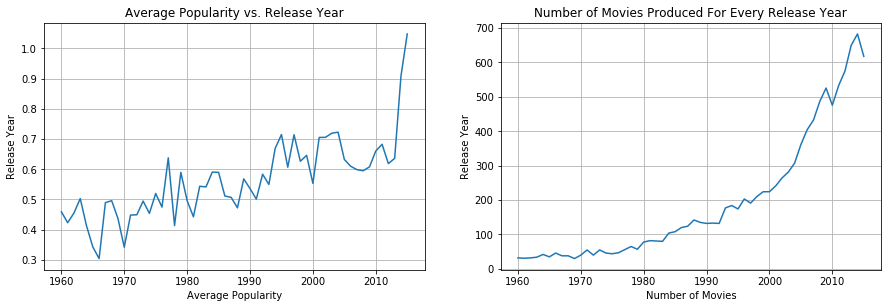

In [19]:
#calculate the average populariy per release year.
df_avg_pop= df.groupby('release_year')['popularity'].mean()
#calculate the number of movies produced in each release year.
df_movies_count = df.groupby('release_year')['original_title'].count()

#plot our data in two side by side plots.
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.grid()
plt.plot(df_avg_pop);
plt.xlabel('Average Popularity')
plt.ylabel('Release Year')
plt.title('Average Popularity vs. Release Year');

plt.subplot(222)
plt.grid()
plt.plot(df_movies_count,);
plt.xlabel('Number of Movies')
plt.ylabel('Release Year')
plt.title('Number of Movies Produced For Every Release Year');

In [20]:
df_avg_pop.tail()

release_year
2011    0.682350
2012    0.618454
2013    0.635676
2014    0.907467
2015    1.047620
Name: popularity, dtype: float64

>We can see that while the number of produced movies has been exponentially increasing from year to year, the average popularity has been steadly increasing and witnessed a sudden rise over the last couple of years (2014,2015) to reach an all time high in 2015.
><br><br> Now let's go through our research questions.

<a id='q1'></a>
### Q1: What are the most popular genres over all time? 
><a href="#questions">Back to questions</a>

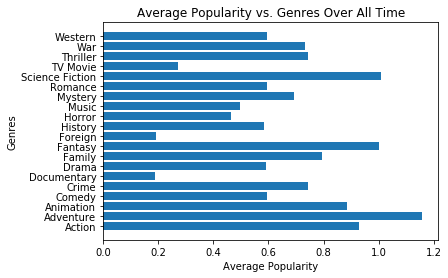

In [21]:
#calulate the average popularity of each genre over all years in a sorted form for plotting.
df_genres_meanpop = df_genres.groupby('genres')['popularity'].mean().sort_values()
#plotting the average popolarity vs. each genre using a horizontal bar plot.
plt.barh(df_genres_meanpop.index, df_genres_meanpop)
plt.xlabel('Average Popularity')
plt.ylabel('Genres')
plt.title('Average Popularity vs. Genres Over All Time');


>According to the chart, Adventure movies are the most popular ones, followed by Sci-Fi and Fantacy movies.

<a id='q2'></a>
### Q2: Which genres are most popular from decade to decade and from year to year?
><a href="#questions">Back to questions</a>

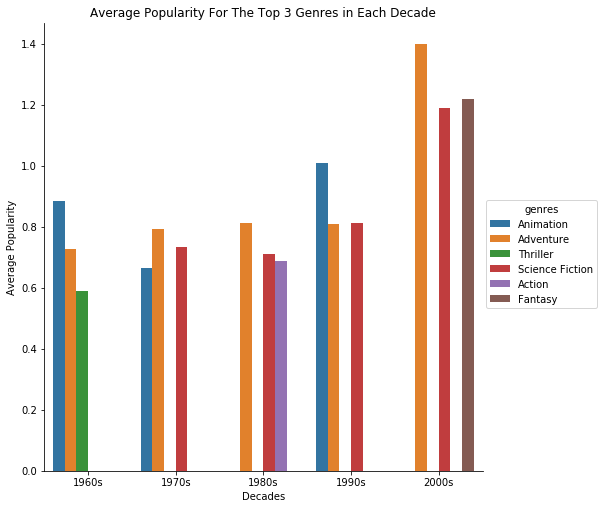

In [22]:
top_n = 3
df_genres_meanpop_decade_top = get_top_mean(df_genres,['decade','genres'],'popularity',top_n) 
sns.factorplot('decade','popularity_mean' ,data =df_genres_meanpop_decade_top , hue='genres',kind = 'bar', size = 7)
plt.xlabel('Decades')
plt.ylabel('Average Popularity')
plt.title('Average Popularity For The Top {} Genres in Each Decade'.format(top_n));

>We can see that the popularity of genres have changed from one decade to another, for the 60s the Animation, Adventure, and Thriller movies are the most popular, while in 2000s, Sci-Fi, Fantasy movies took over and Adventure movies became on the top. It's important also to note that Adventure movies are consistently among the top 3 genres for all decades.

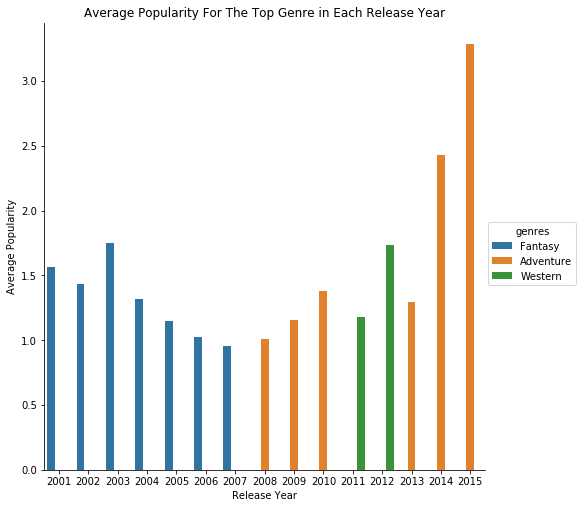

In [23]:
#setting top_n variable for dynamic exploration
top_n = 1
#setting a lambda function for dynamic title formating
out = lambda x: 'Genre' if x ==1 else str(x)+' Genres'
#getting the generes with highest average popularity per release year starting from 2001 to 2015
df_genres_meanpop_year_top = get_top_mean(df_genres.query("release_year>2000"),['release_year','genres'],'popularity',top_n) 
sns.factorplot('release_year','popularity_mean' ,data =df_genres_meanpop_year_top , hue='genres',kind = 'bar', size = 7)
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity For The Top {} in Each Release Year'.format(out(top_n)));

>While observing the popularity of genres from year to year starting from 2001. It's clear that Fantasy movies remain the most popular from 2001 till 2007, then Adventure movies took over starting from year 2008 till 2015, except for the year 2011 and 2012 where Western movies are the most popular. 

<a id='q3'></a>
### Q3: What are the most used keywords?
><a href="#questions">Back to questions</a>

In [24]:
#list the top 5 keywords used over all time.
df_keywords.groupby('keywords')['keywords'].count().sort_values(ascending = False).head(5).reset_index(name = 'count')

,keywords,count
0,woman director,408
1,independent film,393
2,based on novel,278
3,sex,272
4,sport,215


In [25]:
#get the most used keyword in each decade.
df_top_keywords = get_top_count(df_keywords,'decade','keywords',1)
df_top_keywords

KeyError: 'decade'

<a id='q4'></a>
### Q4: What kinds of properties are associated with movies that have high revenues?</a>
><a href="#questions">Back to questions</a>

>In this question we are investigating the association of the following properties with revenue levels:
1. <a href="#R_GN">Genres.</a>
2. <a href="#R_RRN">Runtime.</a>
3. <a href="#R_BG">Budget.</a>
4. <a href="#R_CT">Cast.</a>
5. <a href="#R_DR">Director.</a>

<a id='R_GN'></a>
#### 1. Genres

In [26]:
#add revenue_adj quartile levels to the genres dataframe
create_quartiles(df_genres,'revenue_adj');
#explore which keywords are associated with high revenues
get_top_mean(df_genres,['revenue_adj_levels','genres'],'revenue_adj',1)

,revenue_adj_levels,genres,revenue_adj_mean
0,Low,Animation,5.067224e+06
1,Medium Low,Family,3.143140e+07
2,Medium High,War,1.019040e+08
3,High,Fantasy,5.021379e+08


>Calculating the average revenue for each genre vs. the four adjusted revenue quartiles, shows that Fantasy is the genre associated with the highest revenue over all time.

<a id='R_RN'></a>
#### 2. Runtime

In [27]:
#create a quartile runtime column in the main dataframe and return the bins for reference.
create_quartiles(df,'runtime')

array([   3.,   90.,   99.,  112.,  900.])

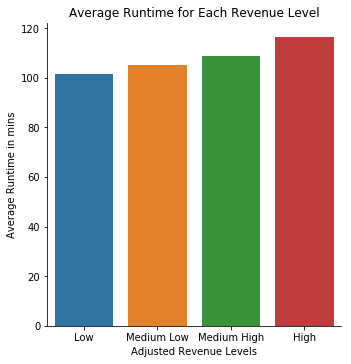

In [28]:
#add revenue_adj quartile levels to the main dataframe
create_quartiles(df,'revenue_adj');
#calculating the average runtime for each adjusted revenue level
avg_runtime = df.groupby('revenue_adj_levels')['runtime'].mean().reset_index(name = 'avg_runtime')

#Plotting the runtime vs. the revenue_adj levels
sns.factorplot('revenue_adj_levels','avg_runtime',data = avg_runtime,kind = 'bar',size = 5)
plt.xlabel('Adjusted Revenue Levels')
plt.ylabel('Average Runtime in mins')
plt.title('Average Runtime for Each Revenue Level');

> We notice here that the longer the movie the higher the revenue level. So longer movies are associated with higher revenue.

<a id='R_BG'></a>
#### 3. Budget

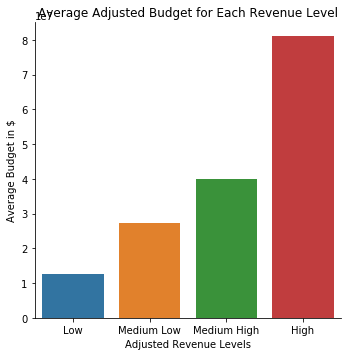

In [29]:
#calculating the average adjusted budget for each adjusted revenue level
avg_budget = df.groupby('revenue_adj_levels')['budget_adj'].mean().reset_index()
#Plotting the adjusted budget vs. the revenue_adj levels
sns.factorplot('revenue_adj_levels','budget_adj',data = avg_budget,kind = 'bar',size = 5)
plt.xlabel('Adjusted Revenue Levels')
plt.ylabel('Average Budget in $')
plt.title('Average Adjusted Budget for Each Revenue Level');

>Looks like budget has a strong association with revenue, and the higher the budget the higher the revenue. This makes perfect sense, since higher budget means more spendings on marketing campaigns, production quality, visual effects, music, etc.. which all can result in a higher revenue. 

<a id='R_CT'></a>
#### 4. Cast
><br>To investigate the cast property, we need first to split the cast names in the main dataframe and drop any nulls.

In [30]:
#split the cast separated by "|" into individual rows.
df_cast = split_df_list(df,'cast','|')
#Drop any rows with empty data.
df_cast.dropna(inplace = True);

In [31]:
df_cast.groupby('cast')['revenue_adj'].mean().sort_values().reset_index().tail()

,cast,revenue_adj
6584,Ken Howard,1.583050e+09
6585,Wendy Gazelle,1.583050e+09
6586,Robert MacNaughton,1.791694e+09
6587,Daisy Ridley,1.902723e+09
6588,Jason Miller,2.167325e+09


<a id='R_DR'></a>
#### 5. Director

In [32]:
#split the director column separated by "|" into individual rows.
df_director = split_df_list(df,'director','|')
#drop any rows with empty data.
df_director.dropna(inplace = True);

In [33]:
df_director.groupby('director')['revenue_adj'].mean().sort_values().reset_index().tail()

,director,revenue_adj
1691,Jennifer Lee,1.192711e+09
1692,Richard Marquand,1.253819e+09
1693,Hamilton Luske,1.574815e+09
1694,Clyde Geronimi,1.574815e+09
1695,Irwin Winkler,1.583050e+09


<a id='conc'></a>
## Conclusions
<a href="#contents"> Back to contents.</a>

>From the previous analysis, we can conclude the following:
1. The number of movies produced every year has been exponentially increasing on yearly basis from 1960 till 2015.
2. Adventure movies are the most popular genre over all time.
3. Popularity of genres has changed from the year 2001 where the most popular genre is Fantasy to 2015 where the most popular genre is Adventure.
4. The most used keywords over all time are:
    * Woman director.
    * Independent film.
    * Based on novel.
    * sex.
    * sport.
    <br>This trend has changed from one decade to another reflecting the preferences during each era. For example, during 80's, the most used keyword was "nudity", while during the 2000's, "woman director" was the most used keyword.
5. When it comes to revenue, it has been observed that the following properties are associated with higher revenues in its respective notion:
    * Fantasy movies had the highest revenue.
    * The longer the movie the higher the revenue.
    * Budget had a direct proportion with revenue.
    * Jason Miller/Irwin Winkler are the actor/director with the highest average revenue.
    
> **The analysis however was limited by missing data in some fields, which was huge to ingnore and were left as nulls through out the investigations, except when it's absolutley relevant to be dropped.**

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0